<a href="https://colab.research.google.com/github/ChabiMax/author_network/blob/main/Code/Graph_from_raw_data_Mat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><strong><font color="chillipepper">Réseau Wikipédia des auteurs francophones</font></strong></center></h1>
<h5><center><font color="green">Science des réseaux sociaux et économiques <h3><center>


<center>
Maxime Chabriel, Yasmine Houri, Mathis Sansu  

ENSAE 2022
</center>

<h2><center><strong><font color="chillipepper">Analyses</font></strong></center></h2>

# Packages

In [2]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import pickle as pkl
import matplotlib.pyplot as plt

# Données

In [3]:
# Lien du repository GitHub pour récupérer les données
git_url = "https://raw.githubusercontent.com/ChabiMax/author_network/main/"
data = pd.read_pickle(git_url+'/Data/raw_data.pkl')

In [4]:
# Passage du dictionnaire sous forme de dataframe
df = pd.DataFrame(data).T
df.head()

,name,link,date_mort,date_naissance,taille_html_article,network_interauteur,poids_liens_interauteur,genres_mentionnes,type,contemporain,poids_contempo_diff_naissance,poids_contempo_annees_communes,auteurs_du_genre,debut_genre,fin_genre
0,Turold,https://fr.wikipedia.org/wiki/Turold,NaN,NaN,73673,[],[],[],auteur,[],[],[],NaN,NaN,NaN
1,Philippe de Thaon,https://fr.wikipedia.org/wiki/Philippe_de_Thaon,NaN,NaN,68910,[],[],[],auteur,[],[],[],NaN,NaN,NaN
2,Benoît de Sainte-Maure,https://fr.wikipedia.org/wiki/Beno%C3%AEt_de_S...,NaN,NaN,83269,[4],[1],[1627],auteur,[],[],[],NaN,NaN,NaN
3,Jean Bodel,https://fr.wikipedia.org/wiki/Jean_Bodel,1165,NaN,73274,"[10, 22]","[1, 1]","[1663, 1691, 1604]",auteur,[],[],[],NaN,NaN,NaN
4,Wace,https://fr.wikipedia.org/wiki/Wace,1174,1100,99714,[6],[2],"[1591, 1662]",auteur,"[5, 6, 7, 9, 10, 11]","[10, 30, 50, 60, 60, 60]","[52, 44, 24, 14, 14, 14]",NaN,NaN,NaN


# Réseau interauteurs : hyperliens auteurs sur les pages auteurs

## Table des liens

In [5]:
id = 0 # Initialisation
id_link = id 
link_table = dict()

for source in df.index :
  if df.iloc[id]['type'] == "auteur":
    for i in range(len(df.iloc[id]['network_interauteur'])):
      target = df.iloc[id]['network_interauteur'][i]
      link_table[id_link] = {'source' : source, 'target' : target}
      weight = df.iloc[id]['poids_liens_interauteur'][i]
      link_table[id_link]['weight'] = weight
      if target in df.iloc[id]['contemporain'] :
        index_contemp = df.iloc[id]['contemporain'].index(target)
        contemporain = 1
        diff_naissance = df.iloc[id]['poids_contempo_diff_naissance'][index_contemp]
        annees_communes = df.iloc[id]['poids_contempo_annees_communes'][index_contemp]
      else:
        contemporain = 0
        diff_naissance = 0
        annees_communes = 0
      link_table[id_link]['contemporain'] = contemporain
      link_table[id_link]['diff_naissance'] = diff_naissance
      link_table[id_link]['annees_communes'] = annees_communes
      id_link +=1
    id += 1

In [6]:
edge_links = pd.DataFrame(link_table).T
edge_links.head()

,source,target,weight,contemporain,diff_naissance,annees_communes
0,2,4,1,0,0,0
1,3,10,1,0,0,0
2,3,22,1,0,0,0
3,4,6,2,1,30,44
4,6,4,1,1,30,44


## Réseau complet

In [7]:
# Graph orienté
GraphAuthorLink = nx.from_pandas_edgelist(edge_links, 'source', 'target', edge_attr = True, create_using=nx.DiGraph())

In [8]:
print(nx.info(GraphAuthorLink))

DiGraph with 1250 nodes and 13021 edges


In [9]:
# match nodes of graph with attributes of nodes
df_node = df[df["type"] == "auteur"]
df_node['Node'] = df_node.index
NodeData = df_node.set_index('Node').to_dict('index').items()
GraphAuthorLink.add_nodes_from(NodeData)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
print(nx.info(GraphAuthorLink))

DiGraph with 1584 nodes and 13021 edges


## Caractéristiques

In [11]:
# Removing isolates
GraphAuthorLink.remove_nodes_from(list(nx.isolates(GraphAuthorLink)))

In [12]:
# Nombre de noeuds
N_nodes = GraphAuthorLink.number_of_nodes()
print(N_nodes)

1250


In [13]:
# Liens sortants
print(GraphAuthorLink.out_degree())
# Liens entrants
print(GraphAuthorLink.in_degree())
# Liens totaux
print(GraphAuthorLink.degree())

[(2, 1), (4, 1), (3, 2), (10, 0), (22, 0), (6, 2), (732, 65), (7, 1), (11, 3), (18, 3), (21, 3), (14, 5), (13, 0), (1, 0), (102, 0), (15, 2), (17, 1), (24, 3), (19, 3), (729, 46), (733, 58), (779, 33), (39, 2), (25, 1), (26, 1), (29, 1), (35, 3), (30, 1), (198, 18), (31, 3), (37, 3), (20, 0), (34, 4), (443, 18), (375, 24), (913, 40), (38, 1), (51, 2), (40, 8), (73, 12), (523, 13), (665, 26), (326, 25), (41, 4), (98, 1), (50, 1), (42, 1), (44, 2), (60, 3), (45, 1), (46, 4), (56, 22), (1255, 3), (1273, 22), (47, 2), (48, 1), (59, 3), (58, 1), (52, 1), (53, 1), (565, 17), (197, 3), (70, 31), (213, 11), (376, 69), (402, 21), (431, 7), (515, 43), (422, 32), (480, 30), (391, 21), (502, 27), (680, 15), (731, 23), (672, 26), (978, 43), (67, 8), (64, 2), (248, 51), (366, 14), (62, 1), (66, 2), (71, 6), (93, 18), (92, 5), (68, 2), (69, 1), (79, 4), (65, 0), (1004, 15), (601, 16), (104, 2), (199, 42), (203, 5), (171, 3), (329, 36), (339, 32), (387, 28), (424, 20), (355, 29), (570, 27), (572, 8), 

In [14]:
# Densité
print(nx.density(GraphAuthorLink))
# Réciprocité globale
print(nx.reciprocity(GraphAuthorLink))
# Réciprocité locale
print(nx.reciprocity(GraphAuthorLink, nodes = GraphAuthorLink.nodes))
# Transitivité
print(nx.transitivity(GraphAuthorLink)) # Coeff de cluster global
print(nx.clustering(GraphAuthorLink)) # Coeff de cluster local
print(nx.average_clustering(GraphAuthorLink)) # Coeff de cluster local moyen

0.008340112089671737
0.5131710314107979
{2: 0.0, 4: 0.5, 3: 0.0, 10: 0.0, 22: 0.0, 6: 0.2222222222222222, 732: 0.6413043478260869, 7: 0.0, 11: 0.6666666666666666, 18: 0.8, 21: 0.8, 14: 0.0, 13: 0.0, 1: 0.0, 102: 0.0, 15: 0.0, 17: 0.6666666666666666, 24: 0.4444444444444444, 19: 0.0, 729: 0.460431654676259, 733: 0.46153846153846156, 779: 0.7792207792207793, 39: 0.8, 25: 0.0, 26: 0.0, 29: 1.0, 35: 0.6666666666666666, 30: 0.0, 198: 0.3, 31: 0.6666666666666666, 37: 0.2857142857142857, 20: 0.0, 34: 0.4, 443: 0.5660377358490566, 375: 0.44155844155844154, 913: 0.8089887640449438, 38: 0.0, 51: 0.5, 40: 0.2, 73: 0.3333333333333333, 523: 0.3333333333333333, 665: 0.10526315789473684, 326: 0.6774193548387096, 41: 0.0, 98: 0.0, 50: 0.0, 42: 0.0, 44: 0.0, 60: 0.0, 45: 0.0, 46: 0.25, 56: 0.21739130434782608, 1255: 0.0, 1273: 0.35, 47: 0.0, 48: 0.0, 59: 0.4, 58: 1.0, 52: 0.0, 53: 0.0, 565: 0.26666666666666666, 197: 0.3076923076923077, 70: 0.21818181818181817, 213: 0.2962962962962963, 376: 0.50925925925

In [15]:
# Cliques
print(list(nx.find_cliques(GraphAuthorLink.to_undirected())))
# Connectivité
print(nx.is_connected(GraphAuthorLink.to_undirected()))
# Connectivité faible
print(nx.is_weakly_connected(GraphAuthorLink))

[[0, 1090], [1, 14], [2, 4, 14], [3, 56], [3, 10], [3, 22], [4, 6], [6, 929], [6, 11, 18, 21], [6, 1524], [6, 1525], [6, 732], [7, 11], [7, 15], [13, 14], [14, 102], [15, 25], [15, 22], [17, 24, 96], [19, 729, 779, 733], [20, 56], [20, 31], [22, 24], [22, 891], [24, 50], [24, 67], [24, 39, 40], [26, 732], [29, 35], [30, 198], [31, 35, 37], [31, 1524], [34, 913], [34, 35], [34, 443], [34, 375], [35, 42], [35, 44], [37, 40], [37, 198], [37, 46, 56], [38, 51], [39, 41], [40, 326, 523], [40, 73], [40, 792, 732], [40, 665], [41, 72, 73], [41, 50], [41, 67, 73], [41, 67, 98], [41, 47], [44, 60], [45, 198], [46, 56, 817], [46, 56, 1445], [46, 1273], [46, 900], [46, 1255], [47, 56], [48, 59], [51, 73], [51, 58], [52, 60], [53, 198], [59, 56], [59, 67, 64], [60, 56], [60, 366, 248], [61, 99], [62, 73], [63, 72], [64, 73, 67], [65, 72, 70], [65, 99], [65, 95], [66, 73, 71], [67, 73, 93], [67, 73, 70], [67, 92, 93], [69, 70], [71, 147], [71, 93, 104, 73], [71, 93, 104, 92], [71, 93, 84, 73], [71,

In [16]:
# Centralité de degré
print(nx.degree_centrality(GraphAuthorLink))
# Centralité de degré entrant
print(nx.in_degree_centrality(GraphAuthorLink))
# Centralité de degré sortant
print(nx.out_degree_centrality(GraphAuthorLink))
# In-edge centralité de vecteur propre
print(nx.eigenvector_centrality(GraphAuthorLink))
# Out-edge centralité de vecteur propre
print(nx.eigenvector_centrality(GraphAuthorLink.reverse()))
# Centralité de distance (inward)
print(nx.closeness_centrality(GraphAuthorLink))
# Centralité de distance (outward)
print(nx.closeness_centrality(GraphAuthorLink.reverse()))
# Centralité betweenness
print(nx.betweenness_centrality(GraphAuthorLink))

{2: 0.0016012810248198558, 4: 0.0032025620496397116, 3: 0.0024019215372297837, 10: 0.0008006405124099279, 22: 0.0032025620496397116, 6: 0.007205764611689351, 732: 0.14731785428342672, 7: 0.0016012810248198558, 11: 0.004803843074459567, 18: 0.0040032025620496394, 21: 0.0040032025620496394, 14: 0.0040032025620496394, 13: 0.0008006405124099279, 1: 0.0008006405124099279, 102: 0.0008006405124099279, 15: 0.0024019215372297837, 17: 0.0024019215372297837, 24: 0.007205764611689351, 19: 0.0024019215372297837, 729: 0.11128903122497998, 733: 0.07285828662930344, 779: 0.06164931945556445, 39: 0.0040032025620496394, 25: 0.0008006405124099279, 26: 0.0008006405124099279, 29: 0.0016012810248198558, 35: 0.007205764611689351, 30: 0.0008006405124099279, 198: 0.04803843074459567, 31: 0.004803843074459567, 37: 0.005604483586869495, 20: 0.0016012810248198558, 34: 0.0040032025620496394, 443: 0.04243394715772618, 375: 0.06164931945556445, 913: 0.07125700560448359, 38: 0.0008006405124099279, 51: 0.0032025620496

# Réseaux interauteurs : hyperliens genre sur les pages auteurs

## Table des liens

In [17]:
df_genre = df[df['type'] == 'genre']
df_genre.head()

,name,link,date_mort,date_naissance,taille_html_article,network_interauteur,poids_liens_interauteur,genres_mentionnes,type,contemporain,poids_contempo_diff_naissance,poids_contempo_annees_communes,auteurs_du_genre,debut_genre,fin_genre
1584,Art poétique,https://fr.wikipedia.org/wiki/Art_po%C3%A9tique,NaN,NaN,NaN,NaN,NaN,NaN,genre,NaN,NaN,NaN,"[37, 96, 172, 422, 572, 615, 680, 729, 877, 1050]",1346,1966
1585,Ballade,https://fr.wikipedia.org/wiki/Ballade,NaN,NaN,NaN,NaN,NaN,NaN,genre,NaN,NaN,NaN,"[31, 40, 41, 46, 47, 56, 172, 654, 1445]",1300,1986
1586,Calligramme,https://fr.wikipedia.org/wiki/Calligramme,NaN,NaN,NaN,NaN,NaN,NaN,genre,NaN,NaN,NaN,"[613, 615, 633]",1876,1967
1587,Chanson,https://fr.wikipedia.org/wiki/Chanson,NaN,NaN,NaN,NaN,NaN,NaN,genre,NaN,NaN,NaN,"[46, 130, 150, 172, 337, 444, 654, 656, 761, 7...",1394,2018
1588,Chant royal,https://fr.wikipedia.org/wiki/Chant_royal,NaN,NaN,NaN,NaN,NaN,NaN,genre,NaN,NaN,NaN,[31],1300,1377


In [18]:
list_link = []
for genre in df_genre.index :
  if len(df_genre['auteurs_du_genre'][genre]) > 1 :
    link = [(a, b) for idx, a in enumerate(df_genre['auteurs_du_genre'][genre]) for b in df_genre['auteurs_du_genre'][1584][idx + 1:]]
    list_link.append(link)
all_link = [item for sublist in list_link for item in sublist]
edge_genre = pd.DataFrame(data=all_link)
edge_genre.rename(columns={0: "source", 1: "target"}, inplace = True)
edge_genre['weight'] = 1
edge_genre = edge_genre.groupby(['source','target'])['weight'].agg('count').reset_index()
edge_genre['contemporain'] = 0
edge_genre['diff_naissance'] = 0
edge_genre['annees_communes'] = 0

In [19]:
for i in edge_genre.index :
  source = edge_genre.iloc[i]['source']
  target = edge_genre.iloc[i]['target']
  if target in df.iloc[source]['contemporain'] :
    index_contemp = df.iloc[source]['contemporain'].index(target)
    contemporain = 1
    diff_naissance = df.iloc[source]['poids_contempo_diff_naissance'][index_contemp]
    annees_communes = df.iloc[source]['poids_contempo_annees_communes'][index_contemp]
  else :
    contemporain = 0
    diff_naissance = 0
    annees_communes = 0
  # print(source, target, contemporain, diff_naissance, annees_communes)
  edge_genre['contemporain'][i] = contemporain
  edge_genre['diff_naissance'][i] = diff_naissance
  edge_genre['annees_communes'][i] = annees_communes

## Réseau complet

In [20]:
# Graph non-orienté
GraphGenreLink = nx.from_pandas_edgelist(edge_genre, 'source', 'target', edge_attr = True, create_using=nx.Graph())

In [21]:
print(nx.info(GraphGenreLink))

Graph with 322 nodes and 1989 edges


In [22]:
# match nodes of graph with attributes of nodes
df_node = df[df["type"] == "auteur"]
df_node['Node'] = df_node.index
NodeData = df_node.set_index('Node').to_dict('index').items()
GraphGenreLink.add_nodes_from(NodeData)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
print(nx.info(GraphGenreLink))

Graph with 1584 nodes and 1989 edges


## Caractéristiques

In [24]:
# Removing isolates
GraphGenreLink.remove_nodes_from(list(nx.isolates(GraphGenreLink)))

In [25]:
# Nombre de noeuds
N_nodes = GraphGenreLink.number_of_nodes()
print(N_nodes)

322


In [26]:
# Liens totaux
print(GraphGenreLink.degree())

[(2, 9), (96, 72), (172, 134), (422, 185), (572, 217), (615, 246), (680, 265), (729, 284), (877, 305), (1050, 321), (3, 9), (4, 9), (5, 9), (6, 9), (7, 7), (11, 6), (13, 8), (14, 9), (19, 9), (20, 9), (21, 9), (22, 8), (24, 7), (26, 8), (28, 9), (31, 9), (34, 9), (35, 8), (37, 9), (38, 9), (40, 8), (41, 7), (45, 9), (46, 9), (47, 5), (48, 9), (49, 9), (51, 9), (54, 4), (56, 9), (59, 8), (68, 9), (70, 9), (71, 9), (72, 7), (73, 9), (77, 8), (78, 9), (79, 9), (80, 9), (81, 8), (87, 9), (90, 9), (92, 8), (93, 9), (97, 8), (99, 9), (101, 5), (105, 8), (106, 7), (107, 7), (109, 6), (110, 8), (113, 8), (115, 7), (116, 6), (117, 8), (122, 4), (123, 6), (126, 9), (129, 8), (130, 8), (134, 5), (136, 2), (138, 7), (139, 9), (140, 5), (142, 8), (144, 4), (147, 6), (150, 7), (151, 8), (157, 7), (161, 4), (164, 9), (170, 3), (174, 6), (178, 4), (179, 6), (181, 9), (182, 5), (184, 8), (187, 4), (188, 4), (190, 8), (191, 8), (192, 1), (194, 6), (196, 9), (197, 3), (198, 4), (199, 9), (200, 7), (202, 

In [27]:
# Densité
print(nx.density(GraphGenreLink))
# Transitivité
print(nx.transitivity(GraphGenreLink)) # Coeff de cluster global
print(nx.clustering(GraphGenreLink)) # Coeff de cluster local
print(nx.average_clustering(GraphGenreLink)) # Coeff de cluster local moyen

0.03848609740523597
0.07079635778829355
{2: 1.0, 96: 0.2112676056338028, 172: 0.11103400416377515, 422: 0.07602233831742028, 572: 0.06127325482164192, 615: 0.052081225123119475, 680: 0.04594053744997141, 729: 0.04141743015067767, 877: 0.035893011216566004, 1050: 0.032398753894081, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0, 7: 1.0, 11: 1.0, 13: 1.0, 14: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 1.0, 24: 1.0, 26: 1.0, 28: 1.0, 31: 1.0, 34: 1.0, 35: 1.0, 37: 1.0, 38: 1.0, 40: 1.0, 41: 1.0, 45: 1.0, 46: 1.0, 47: 1.0, 48: 1.0, 49: 1.0, 51: 1.0, 54: 1.0, 56: 1.0, 59: 1.0, 68: 1.0, 70: 1.0, 71: 1.0, 72: 1.0, 73: 1.0, 77: 1.0, 78: 1.0, 79: 1.0, 80: 1.0, 81: 1.0, 87: 1.0, 90: 1.0, 92: 1.0, 93: 1.0, 97: 1.0, 99: 1.0, 101: 1.0, 105: 1.0, 106: 1.0, 107: 1.0, 109: 1.0, 110: 1.0, 113: 1.0, 115: 1.0, 116: 1.0, 117: 1.0, 122: 1.0, 123: 1.0, 126: 1.0, 129: 1.0, 130: 1.0, 134: 1.0, 136: 1.0, 138: 1.0, 139: 1.0, 140: 1.0, 142: 1.0, 144: 1.0, 147: 1.0, 150: 1.0, 151: 1.0, 157: 1.0, 161: 1.0, 164: 1.0, 170: 1.0, 174: 1.0, 

In [28]:
# Connectivité faible
print(nx.is_connected(GraphGenreLink))

True


In [29]:
# Centralité de degré
print(nx.degree_centrality(GraphGenreLink))
# In-edge centralité de vecteur propre
print(nx.eigenvector_centrality(GraphGenreLink))
# Centralité de distance (inward)
print(nx.closeness_centrality(GraphGenreLink))
# Centralité betweenness
print(nx.betweenness_centrality(GraphGenreLink))

{2: 0.028037383177570093, 96: 0.22429906542056074, 172: 0.4174454828660436, 422: 0.5763239875389408, 572: 0.67601246105919, 615: 0.7663551401869159, 680: 0.8255451713395638, 729: 0.8847352024922118, 877: 0.9501557632398754, 1050: 1.0, 3: 0.028037383177570093, 4: 0.028037383177570093, 5: 0.028037383177570093, 6: 0.028037383177570093, 7: 0.021806853582554516, 11: 0.018691588785046728, 13: 0.024922118380062305, 14: 0.028037383177570093, 19: 0.028037383177570093, 20: 0.028037383177570093, 21: 0.028037383177570093, 22: 0.024922118380062305, 24: 0.021806853582554516, 26: 0.024922118380062305, 28: 0.028037383177570093, 31: 0.028037383177570093, 34: 0.028037383177570093, 35: 0.024922118380062305, 37: 0.028037383177570093, 38: 0.028037383177570093, 40: 0.024922118380062305, 41: 0.021806853582554516, 45: 0.028037383177570093, 46: 0.028037383177570093, 47: 0.01557632398753894, 48: 0.028037383177570093, 49: 0.028037383177570093, 51: 0.028037383177570093, 54: 0.012461059190031152, 56: 0.02803738317

# Comparaison des réseaux d'hyperliens auteurs et hyperliens genres

## Centralité

In [30]:
# Type de graphe (dirigé / non-dirigé)
print('type(GraphAuthorLink) : ',type(GraphAuthorLink)) # dirigé
print('type(GraphGenreLink) : ',type(GraphGenreLink)) # non-dirigé

type(GraphAuthorLink) :  <class 'networkx.classes.digraph.DiGraph'>
type(GraphGenreLink) :  <class 'networkx.classes.graph.Graph'>


In [31]:
# Type de graphe (connecté / non-connecté)
# print('Is GraphAuthorLink connected ? ', nx.is_connected(GraphAuthorLink)) # not implemented for DiGraph
print('Is GraphGenreLink connected ? : ', nx.is_connected(GraphGenreLink))

Is GraphGenreLink connected ? :  True


In [32]:
# Y a-t-il des noeuds reliés à eux-mêmes?
print("selfloop_edges(GraphAuthorLink) : ", list(nx.selfloop_edges(GraphAuthorLink)))
print("selfloop_edges(GraphGenreLink) : ", list(nx.selfloop_edges(GraphAuthorLink)))

selfloop_edges(GraphAuthorLink) :  [(436, 436), (853, 853)]
selfloop_edges(GraphGenreLink) :  [(436, 436), (853, 853)]


In [33]:
# Noeuds importants
from operator import itemgetter
central_AuthorLink = dict(sorted(nx.degree_centrality(GraphAuthorLink).items(), key = itemgetter(1), reverse = True)[:50])
print("Top 5 central nodes in GraphAuthorLink: ", central_AuthorLink)
central_GenreLink = dict(sorted(nx.degree_centrality(GraphGenreLink).items(), key = itemgetter(1), reverse = True)[:50])
print("Top 5 central nodes in GraphGenreLink: ", central_GenreLink)

common_central_nodes = central_AuthorLink.keys() & central_GenreLink.keys()
# print("Common central nodes: ", df.iloc[list(common_central_nodes)[0]]['name'])

Top 5 central nodes in GraphAuthorLink:  {376: 0.17293835068054442, 732: 0.14731785428342672, 248: 0.14571657325860687, 673: 0.12009607686148918, 582: 0.11689351481184947, 715: 0.11529223378702962, 729: 0.11128903122497998, 367: 0.11128903122497998, 806: 0.11128903122497998, 701: 0.11048839071257005, 509: 0.10728582866293034, 792: 0.10648518815052041, 877: 0.10408326661329062, 265: 0.10008006405124098, 752: 0.09927942353883105, 615: 0.09847878302642113, 574: 0.09687750200160128, 663: 0.09687750200160128, 479: 0.09367493995196156, 709: 0.09127301841473177, 422: 0.09047237790232185, 344: 0.08807045636509207, 1049: 0.08807045636509207, 515: 0.08726981585268213, 542: 0.08646917534027221, 589: 0.08566853482786228, 533: 0.08406725380304243, 674: 0.08406725380304243, 590: 0.08246597277822257, 329: 0.08086469175340272, 781: 0.08006405124099279, 584: 0.07926341072858287, 722: 0.07846277021617293, 379: 0.077662129703763, 978: 0.07686148919135308, 1394: 0.07606084867894315, 199: 0.074459567654123

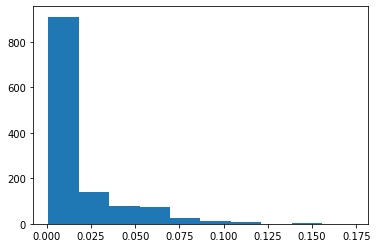

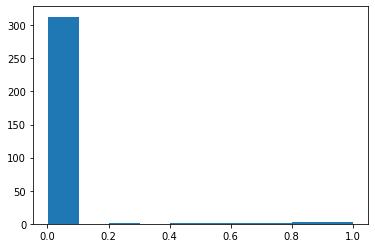

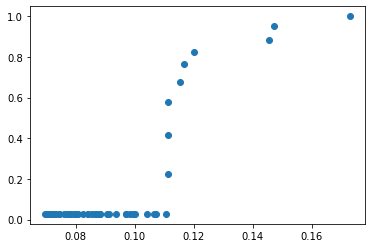

In [34]:
# Comparaison de la degree centrality des 2 graphes
# Plot a histogram of the degree centrality distribution in GraphAuthorLink
plt.figure()
plt.hist(list(nx.degree_centrality(GraphAuthorLink).values()))
plt.show()

# Plot a histogram of the degree distribution in GraphGenreLink
plt.figure()
plt.hist(list(nx.degree_centrality(GraphGenreLink).values()))
plt.show()

# Plot a scatter plot of the centrality distribution in both graphs
plt.figure()
plt.scatter(list(central_AuthorLink.values()), list(central_GenreLink.values()))
plt.show() # pas de corrélation

## Structure

In [35]:
UGraphAuthorLink = GraphAuthorLink.to_undirected()

### Triads

In [36]:
# Triads
triads_authors = { key: value for key, value in nx.triangles(UGraphAuthorLink).items() if value > 0 }
triads_genres = { key: value for key, value in nx.triangles(GraphGenreLink).items() if value > 0 }
print("Nombre d'auteurs engagés dans au moins une triade dans UGraphAuthorLink : ", len(triads_authors))
print("Nombre d'auteurs engagés dans au moins une triade dans GraphGenreLink : ", len(triads_genres))

Nombre d'auteurs engagés dans au moins une triade dans UGraphAuthorLink :  895
Nombre d'auteurs engagés dans au moins une triade dans GraphGenreLink :  306


In [37]:
# Top 50 des auteurs engagés dans le plus de triades
top_triads_authors = dict(sorted(triads_authors.items(), key = itemgetter(1), reverse = True)[:50])
top_triads_genres = dict(sorted(triads_genres.items(), key = itemgetter(1), reverse = True)[:50])
common_triad_nodes = top_triads_authors.keys() & top_triads_genres.keys()
print(common_triad_nodes)
print(df.iloc[729]['name'])
print(df.iloc[422]['name'])
print(df.iloc[615]['name'])

{729, 422, 615}
André Breton
Charles Baudelaire
Max Jacob


### Cliques

In [38]:
author_cliques = list(nx.find_cliques(UGraphAuthorLink))
genre_cliques = list(nx.find_cliques(GraphGenreLink))
common_cliques = [x for x in author_cliques if x in genre_cliques]
len(common_cliques) # no common cliques

0

### Isomorphisme et mesures de similarité

In [39]:
# Isomorphisme
nx.is_isomorphic(UGraphAuthorLink, GraphGenreLink)

False

In [ ]:
# Not run: utilise toute la RAM puis plante
# nx.graph_edit_distance(UGraphAuthorLink, GraphGenreLink)

In [42]:
# Not run: utilise toute la RAM puis plante
# nx.optimal_edit_paths(UGraphAuthorLink, GraphGenreLink)

## Contemporanéité

### Construction des graphes des auteurs contemporains (hyperliens puis genres)

In [47]:
edge_links_contemp = edge_links[edge_links['contemporain'] == 1]
# edge_links_contemp

In [48]:
# Graph orienté
GraphAuthorContemp = nx.from_pandas_edgelist(edge_links_contemp, 'source', 'target', edge_attr = True, create_using=nx.DiGraph())
nx.info(GraphAuthorContemp)

'DiGraph with 860 nodes and 8424 edges'

In [49]:
edge_genre_contemp = edge_genre[edge_genre['contemporain'] == 1]
# edge_genre_contemp

In [50]:
# Graph non-orienté
GraphGenreContemp = nx.from_pandas_edgelist(edge_genre_contemp, 'source', 'target', edge_attr = True, create_using=nx.Graph())
nx.info(GraphGenreContemp)

'Graph with 136 nodes and 361 edges'

### Comparaison de la structure des deux graphes

In [57]:
UGraphAuthorContemp = GraphAuthorContemp.to_undirected()

In [58]:
# Cliques
author_contemp_cliques = list(nx.find_cliques(UGraphAuthorContemp))
genre_contemp_cliques = list(nx.find_cliques(GraphGenreContemp))
common_contemp_cliques = [x for x in author_contemp_cliques if x in genre_contemp_cliques]
len(common_contemp_cliques) # no common cliques

0

In [59]:
# Isomorphisme
nx.is_isomorphic(UGraphAuthorContemp, GraphGenreContemp)

False

In [61]:
# Not run: utilise toute la RAM puis plante
# nx.graph_edit_distance(UGraphAuthorContemp, GraphGenreContemp)